In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/Cleaned/longevity_reduced.csv')
df.head()

,Country Name,"Age at first marriage, female","Age at first marriage, male",Capital health expenditure (% of GDP),Death due to disease and nutrition,Death due to injury,Non-communicable diseases,Community health workers,"Condom use, population ages 15-24",Consumption of iodized salt,...,Hepatitis B resistance,Measles,BMI,Diphtheria resistance,HIV/AIDS,GDP,Polio,Schooling,Alcohol,"Life expectancy at birth, total (years)"
0,Afghanistan,2.140000e+01,2.470000e+01,2.441649e-01,49.118515,11.865492,39.015993,5.053479e+06,5.053479e+06,46.566667,...,64.562500,2362.250000,15.518750,52.312500,0.10000,340.015425,48.375000,8.212500,0.014375,59.439000
1,Africa Eastern And Southern,5.053479e+06,5.053479e+06,5.053479e+06,59.703069,9.171409,31.125521,5.053479e+06,3.460712e+01,62.264491,...,80.862429,2331.640525,38.325809,82.193116,1.67715,7550.512712,82.196424,12.040561,4.604644,56.532946
2,Africa Western And Central,5.053479e+06,5.053479e+06,5.053479e+06,66.095155,7.494896,26.409949,1.440893e-01,3.839535e+01,78.086400,...,80.862429,2331.640525,38.325809,82.193116,1.67715,7550.512712,82.196424,12.040561,4.604644,53.366361
3,Albania,2.406667e+01,2.814000e+01,1.452148e-01,4.774622,6.005545,89.219834,5.053479e+06,4.980000e+01,88.833333,...,98.000000,53.375000,49.068750,98.062500,0.10000,2119.726679,98.125000,12.137500,4.848750,77.196062
4,Algeria,2.912500e+01,3.292500e+01,1.103354e-02,16.714915,9.922490,73.362596,5.053479e+06,5.053479e+06,74.900000,...,78.740211,1943.875000,48.743750,91.875000,0.10000,2847.853392,91.750000,12.712500,0.669678,72.913625


## Random Forest Feature Importance

,Feat Index,Feature,Importance
0,42,Basic sanitation services,1.532364e-01
1,28,Incidence of tuberculosis,1.398417e-01
2,40,People practicing open defecation,1.287948e-01
3,41,Basic drinking water services,1.144550e-01
4,10,Births attended by skilled health staff,1.005440e-01
5,43,Lack of managed drinking water services,6.131184e-02
6,58,Specialist surgical workforce,5.576670e-02
7,0,"Age at first marriage, female",5.133521e-02
8,32,Road traffic injury,4.452048e-02
9,14,Absence of Diabetes,4.018678e-02


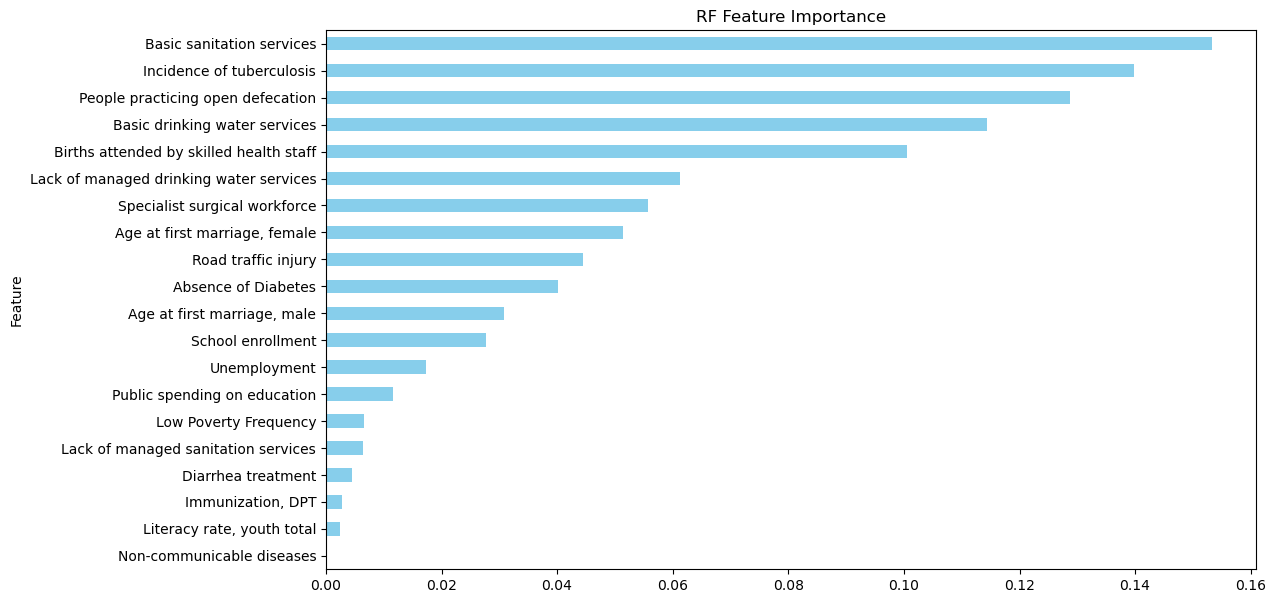

In [75]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature', y='Importance', kind='barh', figsize=(12,7), legend=False, title='RF Feature Importance', color='skyblue')
    plt.show()
    return RF_ranking

X_train = df.drop(['Country Name', 'Life expectancy at birth, total (years)'], axis=1)
y_train = df['Life expectancy at birth, total (years)']

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
top_feats = 20
ranking = calc_feature_importances(rf_model,X_train.columns,top_feats)

## Correlation Matrix

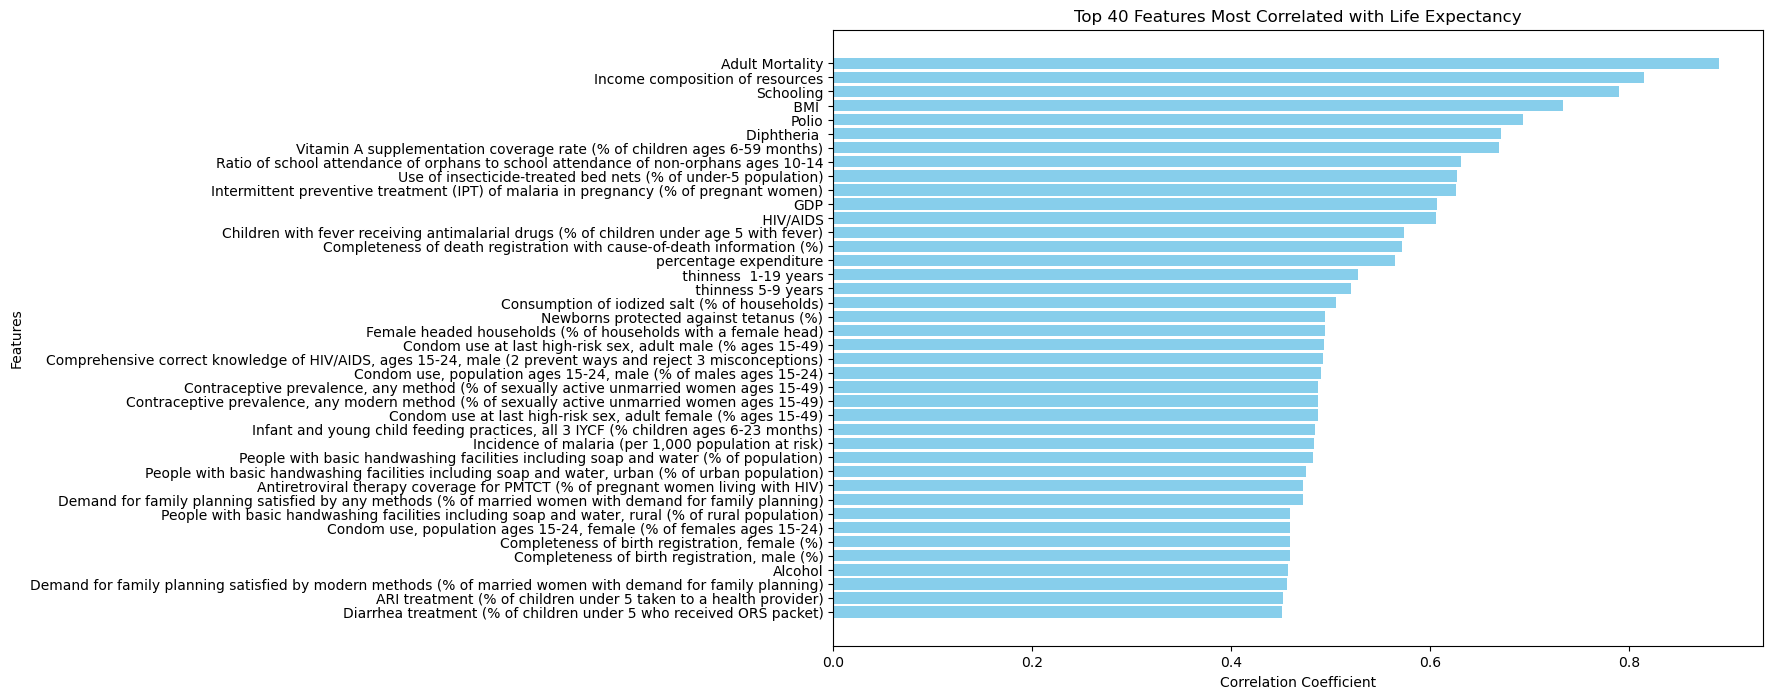

In [76]:
correlation_matrix = df3.corr()
target_correlation = correlation_matrix['Life expectancy ']
top_features = target_correlation.abs().sort_values(ascending=False)[1:41]

top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Correlation']
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.barh(top_features_df['Feature'], top_features_df['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Top 40 Features Most Correlated with Life Expectancy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()